<a href="https://colab.research.google.com/github/moushumipriya/Norwegian-Fish-Movement-Prediction-Using-LSTM-ML/blob/main/Norwegian-Fish-Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

open a new Colab notebook and run this cell to upload the CSV file:


In [41]:
from google.colab import files
uploaded = files.upload()


Saving student_management.sql to student_management.sql


Import Libraries


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 Load Dataset

In [43]:
df = pd.read_csv("fish_movement_norway.csv")
df.head()


,Date,Temp_C,Salinity,Oxygen_mg_L,Depth_m,Region,Fish_Count
0,2024-01-01,8.04,33.40,6.82,39.06,Trondheim_Fjord,24
1,2024-01-01,10.79,34.35,7.26,16.09,Lofoten_Islands,20
2,2024-01-01,9.54,34.77,6.75,28.74,Barents_Sea,18
3,2024-01-02,9.20,34.56,6.21,36.24,Trondheim_Fjord,28
4,2024-01-02,9.91,33.34,6.97,41.14,Lofoten_Islands,20


Basic Data Info


In [44]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (1095, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1095 non-null   object 
 1   Temp_C       1095 non-null   float64
 2   Salinity     1095 non-null   float64
 3   Oxygen_mg_L  1095 non-null   float64
 4   Depth_m      1095 non-null   float64
 5   Region       1095 non-null   object 
 6   Fish_Count   1095 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 60.0+ KB


,Temp_C,Salinity,Oxygen_mg_L,Depth_m,Fish_Count
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,9.615872,34.309379,6.507315,27.345050,21.438356
std,1.821806,0.905203,0.704964,12.827184,4.135457
min,4.330000,31.500000,4.250000,5.060000,8.000000
25%,8.335000,33.640000,6.020000,16.590000,19.000000
50%,9.600000,34.330000,6.500000,26.700000,21.000000
75%,10.810000,34.930000,6.970000,38.925000,24.000000
max,15.400000,37.390000,8.670000,49.920000,34.000000


Check for Null Values

In [45]:
df.isnull().sum()


,0
Date,0
Temp_C,0
Salinity,0
Oxygen_mg_L,0
Depth_m,0
Region,0
Fish_Count,0


Plot Fish Count Over Time

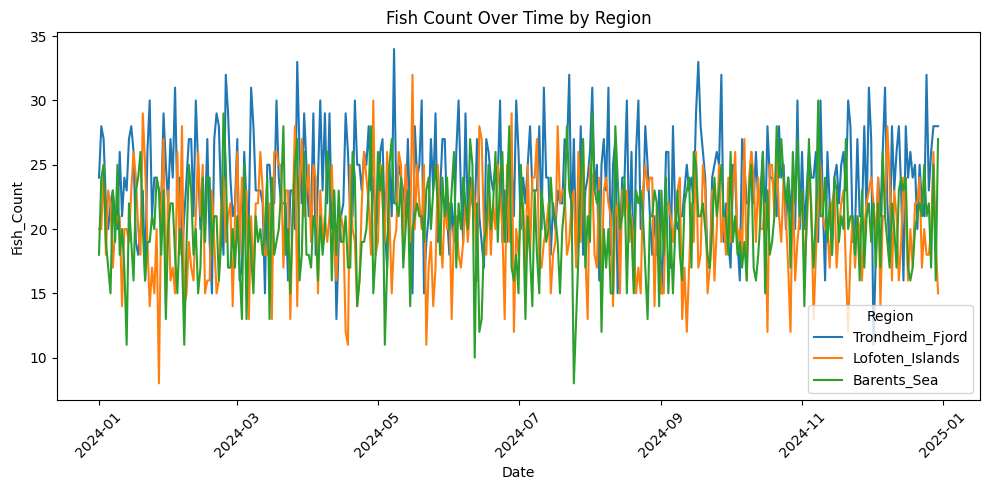

In [46]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Fish_Count', hue='Region')
plt.title('Fish Count Over Time by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Correlation Heatmap

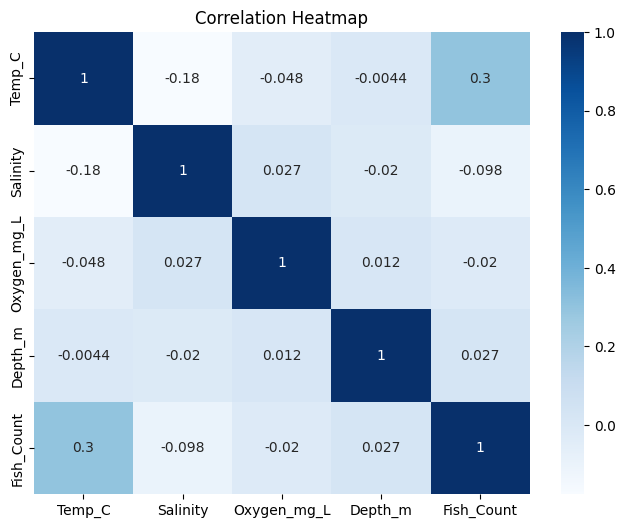

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


Feature Engineering

In [48]:
# Convert Date to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Create new feature: Season
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

df['Season'] = df['Date'].dt.month.map(get_season)

# Drop 'Date' column (not needed for ML)
df = df.drop(columns=['Date'])

df.head()


,Temp_C,Salinity,Oxygen_mg_L,Depth_m,Region,Fish_Count,Season
0,8.04,33.40,6.82,39.06,Trondheim_Fjord,24,Winter
1,10.79,34.35,7.26,16.09,Lofoten_Islands,20,Winter
2,9.54,34.77,6.75,28.74,Barents_Sea,18,Winter
3,9.20,34.56,6.21,36.24,Trondheim_Fjord,28,Winter
4,9.91,33.34,6.97,41.14,Lofoten_Islands,20,Winter


 Encode Categorical Features

In [49]:
df_encoded = pd.get_dummies(df, columns=['Region', 'Season'], drop_first=True)
df_encoded.head()


,Temp_C,Salinity,Oxygen_mg_L,Depth_m,Fish_Count,Region_Lofoten_Islands,Region_Trondheim_Fjord,Season_Spring,Season_Summer,Season_Winter
0,8.04,33.40,6.82,39.06,24,False,True,False,False,True
1,10.79,34.35,7.26,16.09,20,True,False,False,False,True
2,9.54,34.77,6.75,28.74,18,False,False,False,False,True
3,9.20,34.56,6.21,36.24,28,False,True,False,False,True
4,9.91,33.34,6.97,41.14,20,True,False,False,False,True


: Define Features and Target

In [50]:
X = df_encoded.drop(columns=['Fish_Count'])
y = df_encoded['Fish_Count']


Train-Test Split

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


: Train ML Models & Evaluate

Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("📊 Random Forest Performance:")
print(f"RMSE: {mse_rf**0.5:.2f}")
print(f"R² Score: {r2_rf:.2f}")


📊 Random Forest Performance:
RMSE: 3.50
R² Score: 0.27


 XGBoost Model

In [53]:
!pip install xgboost

import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("📊 XGBoost Performance:")
print(f"RMSE: {mse_xgb**0.5:.2f}")
print(f"R² Score: {r2_xgb:.2f}")


📊 XGBoost Performance:
RMSE: 3.59
R² Score: 0.24


 Plot Actual vs Predicted (for best model)

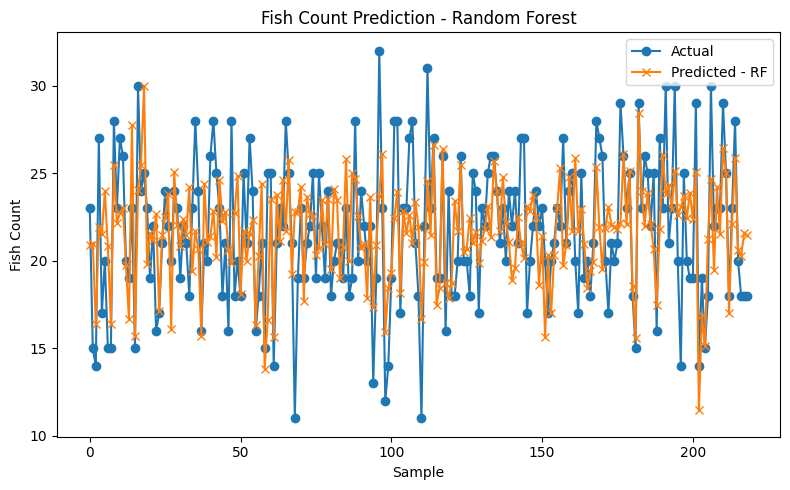

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_rf, label='Predicted - RF', marker='x')
plt.title('Fish Count Prediction - Random Forest')
plt.xlabel('Sample')
plt.ylabel('Fish Count')
plt.legend()
plt.tight_layout()
plt.show()


Evaluate with MAE, RMSE, R² for both models

In [55]:
from sklearn.metrics import mean_absolute_error

# Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("🔍 Evaluation Metrics:")
print("Random Forest:")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")
print("\nXGBoost:")
print(f"MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")


🔍 Evaluation Metrics:
Random Forest:
MAE: 2.80, RMSE: 3.50, R²: 0.27

XGBoost:
MAE: 2.88, RMSE: 3.59, R²: 0.24


Residual Plot (Error Visualization)


/tmp/ipython-input-667610179.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


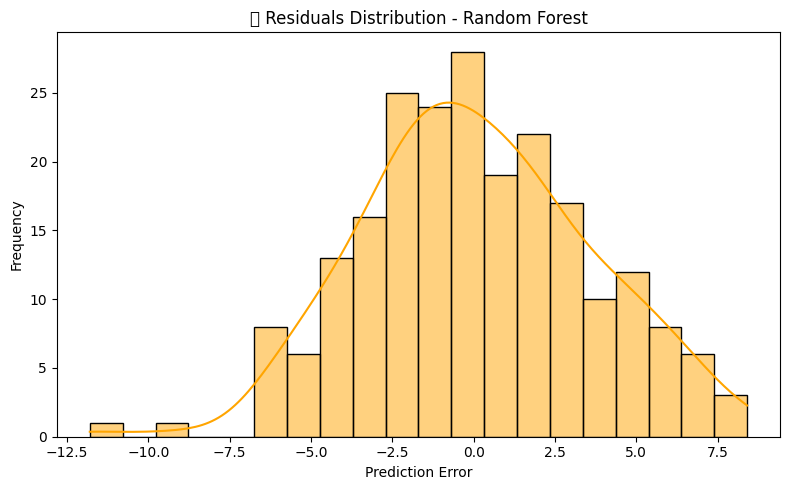

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title("📉 Residuals Distribution - Random Forest")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Feature Importance Plot

/tmp/ipython-input-2450040980.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
/tmp/ipython-input-2450040980.py:15: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


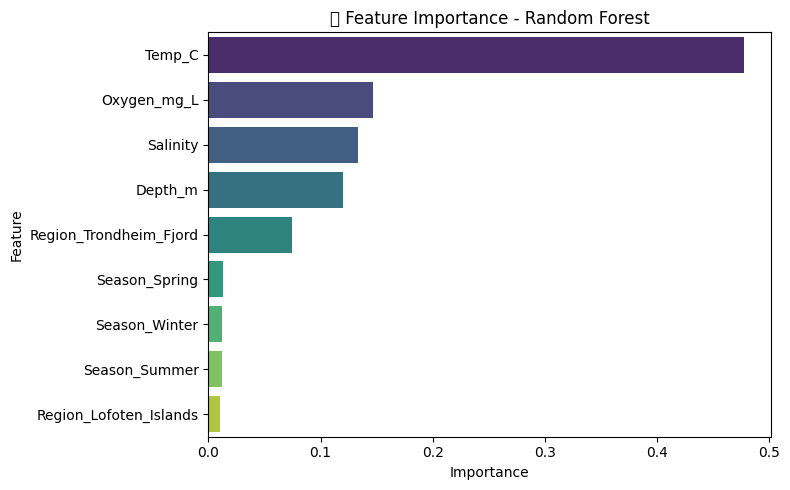

In [57]:
import pandas as pd

# Get feature importances from RandomForest
importance_rf = rf_model.feature_importances_

# Match with column names
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance_rf})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("🌟 Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


USING LSTM


In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_lstm.shape[1], X_lstm.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_lstm, y_lstm, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 456.4874 - mae: 20.9743 - val_loss: 401.8263 - val_mae: 19.6795
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 311.9946 - mae: 17.0683 - val_loss: 101.3098 - val_mae: 9.1752
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 47.9882 - mae: 5.7802 - val_loss: 31.5850 - val_mae: 4.5549
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 25.7808 - mae: 4.0432 - val_loss: 29.1200 - val_mae: 4.3470
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 23.3791 - mae: 3.9059 - val_loss: 29.0957 - val_mae: 4.3516
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 22.4044 - mae: 3.8404 - val_loss: 28.7413 - val_mae: 4.3271
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 22.5149 - mae: 3.7940 - val_loss: 27.1882 - val_mae: 4.1947
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 23.2396 - mae: 3.9072 - val_loss: 26.4291 - val_mae: 4.1311
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - los

 Accuracy Visualization:


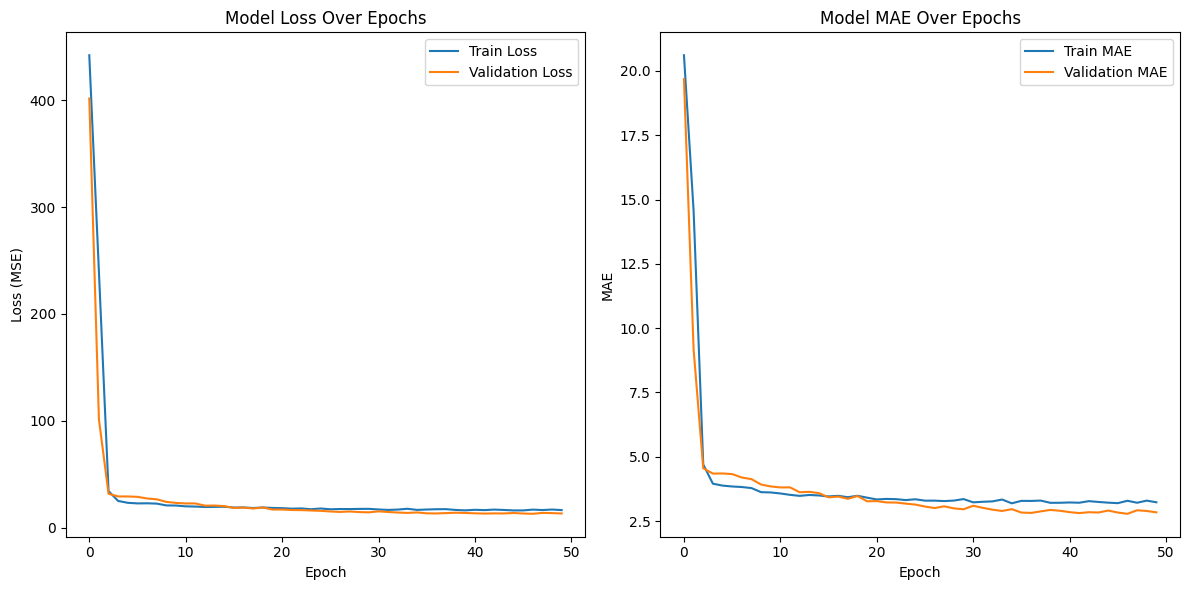

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [60]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM [samples, time steps, features]
# Assuming a time step of 1 for now, adjust if needed for sequence prediction
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
y_lstm = y.values # Convert target to numpy array

print("Shape of X_lstm:", X_lstm.shape)
print("Shape of y_lstm:", y_lstm.shape)

Shape of X_lstm: (1095, 1, 9)
Shape of y_lstm: (1095,)


In [61]:
def create_multi_step_sequences(data, window_size=7, forecast_horizon=7):
    X, y = [], []
    for i in range(len(data) - window_size - forecast_horizon + 1):
        X.append(data[i:i+window_size].drop(columns=['Fish_Count']).values)
        y.append(data[i+window_size:i+window_size+forecast_horizon]['Fish_Count'].values)
    return np.array(X), np.array(y)

X_multi, y_multi = create_multi_step_sequences(scaled_df, window_size=7, forecast_horizon=7)
print(X_multi.shape, y_multi.shape)
# Expected output: (samples, 7, features), (samples, 7)


(1082, 7, 9) (1082, 7)


Evaluate LSTM Model

In [62]:
# Prepare test data for LSTM
# Need to use the same scaler fitted on the training data
# Split X_scaled and y_lstm into train and test sets first
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=42
)


# Predict
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse_lstm = mse_lstm**0.5
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)


print("📊 LSTM Performance:")
print(f"MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}, R² Score: {r2_lstm:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
📊 LSTM Performance:
MAE: 3.11, RMSE: 3.89, R² Score: 0.10


Plot Actual vs Predicted (LSTM)

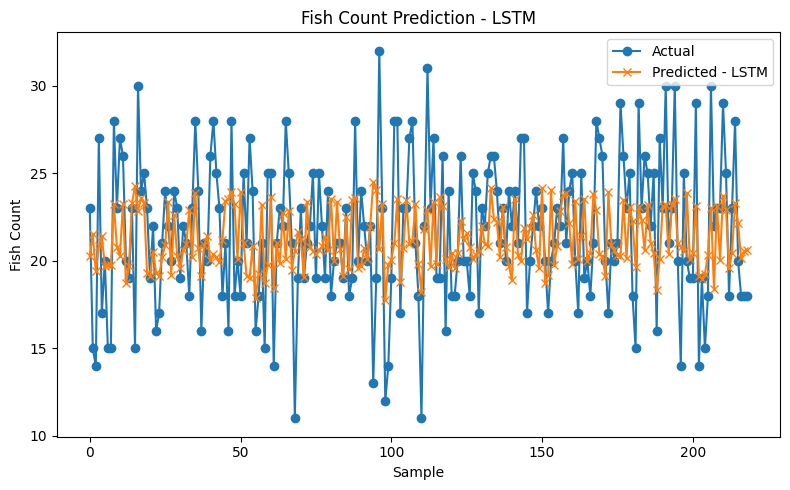

In [63]:
# Plot
plt.figure(figsize=(8,5))
plt.plot(y_test_lstm, label='Actual', marker='o')
plt.plot(y_pred_lstm, label='Predicted - LSTM', marker='x')
plt.title('Fish Count Prediction - LSTM')
plt.xlabel('Sample')
plt.ylabel('Fish Count')
plt.legend()
plt.tight_layout()
plt.show()

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_multi = Sequential([
    LSTM(64, input_shape=(X_multi.shape[1], X_multi.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7)  # Predict 7 days output
])

model_multi.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_multi = model_multi.fit(X_multi, y_multi, epochs=50, batch_size=16, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 433.1895 - mae: 20.2811 - val_loss: 145.4733 - val_mae: 10.9487
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 83.4608 - mae: 7.5542 - val_loss: 16.6457 - val_mae: 3.2242
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 20.7647 - mae: 3.6295 - val_loss: 14.6387 - val_mae: 2.9898
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 19.7370 - mae: 3.5512 - val_loss: 14.8153 - val_mae: 2.9904
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 20.4679 - mae: 3.5989 - val_loss: 14.7656 - val_mae: 2.9897
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 19.6183 - mae: 3.5454 - val_loss: 14.6915 - val_mae: 2.9906
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 19.5477 - mae: 3.5178 - val_loss: 14.7802 - val_mae: 2.9934
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 19.5895 - mae: 3.5277 - val_loss: 14.9468 - val_mae: 2.9978
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17m

In [65]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Encode categorical features
df_encoded_multi = pd.get_dummies(df, columns=['Region', 'Season'], drop_first=True)

# Scale the original DataFrame (excluding the target variable)
scaler_multi = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_multi.fit_transform(df_encoded_multi.drop(columns=['Fish_Count']))

# Create a new DataFrame with scaled features and the original target
scaled_df = pd.DataFrame(scaled_features, columns=df_encoded_multi.drop(columns=['Fish_Count']).columns)
scaled_df['Fish_Count'] = df_encoded_multi['Fish_Count'].values

# Now call the function to create multi-step sequences
X_multi, y_multi = create_multi_step_sequences(scaled_df, window_size=7, forecast_horizon=7)
print("Shape of X_multi:", X_multi.shape)
print("Shape of y_multi:", y_multi.shape)

Shape of X_multi: (1082, 7, 9)
Shape of y_multi: (1082, 7)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


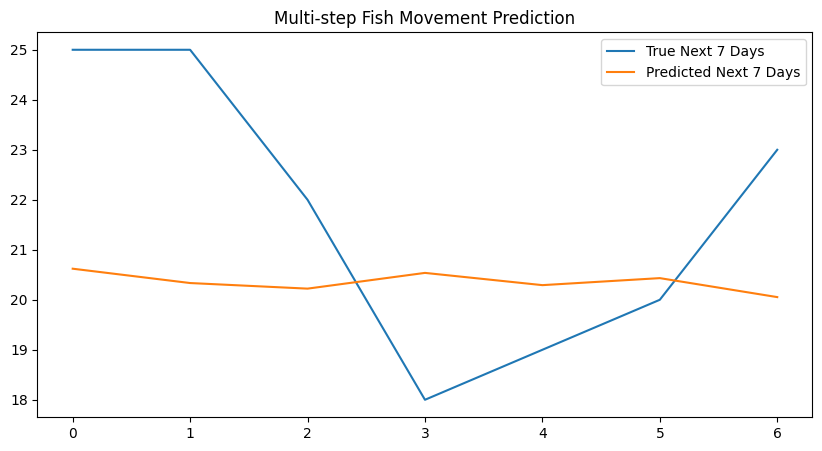

In [66]:
preds_multi = model_multi.predict(X_multi)

plt.figure(figsize=(10,5))
plt.plot(y_multi[0], label="True Next 7 Days")
plt.plot(preds_multi[0], label="Predicted Next 7 Days")
plt.legend()
plt.title("Multi-step Fish Movement Prediction")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


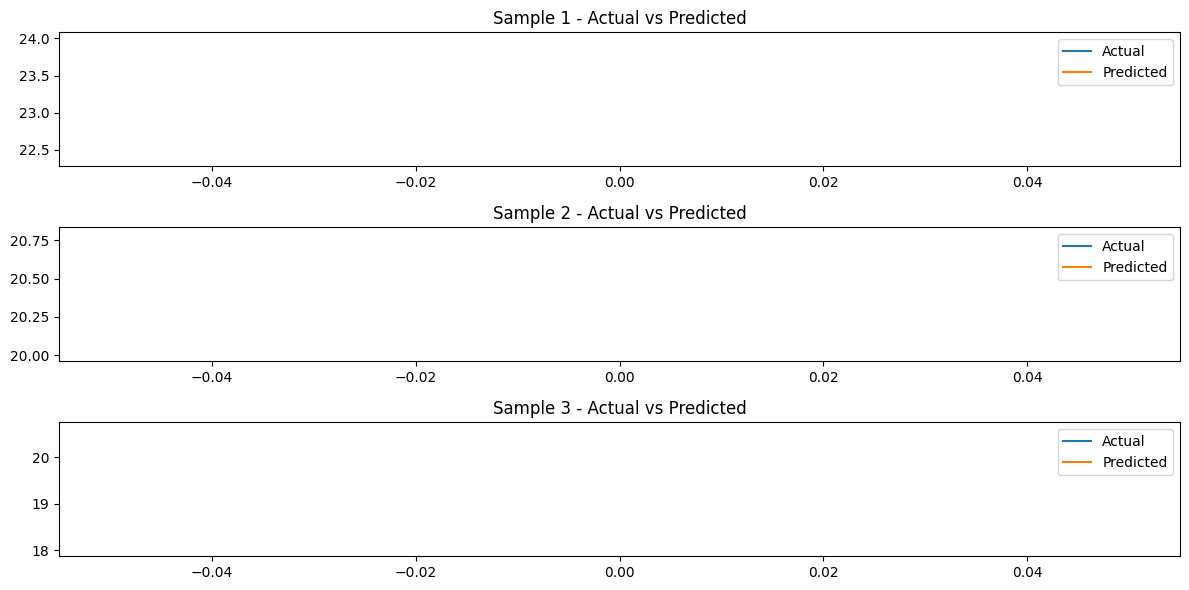

In [67]:
plt.figure(figsize=(12, 6))
for i in range(3):  # plot first 3 sequences
    plt.subplot(3, 1, i+1)
    plt.plot(y_lstm[i], label='Actual')
    plt.plot(model.predict(X_lstm[i:i+1])[0], label='Predicted')
    plt.title(f'Sample {i+1} - Actual vs Predicted')
    plt.legend()
plt.tight_layout()
plt.show()



35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


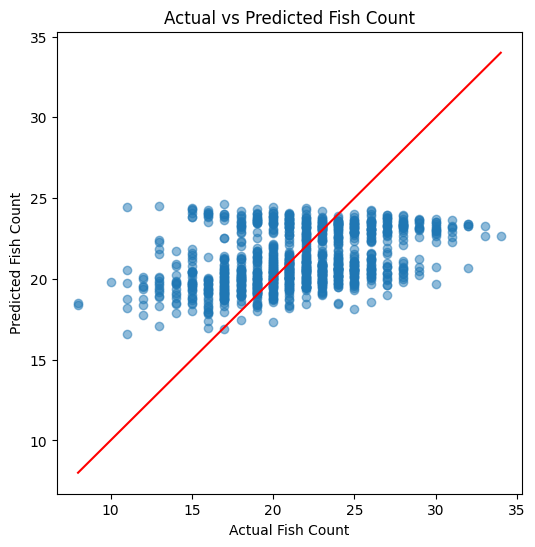

In [68]:
y_pred = model.predict(X_lstm)
plt.figure(figsize=(6,6))
plt.scatter(y_lstm, y_pred, alpha=0.5)
plt.plot([min(y_lstm), max(y_lstm)], [min(y_lstm), max(y_lstm)], color='red')  # ideal line y=x
plt.xlabel('Actual Fish Count')
plt.ylabel('Predicted Fish Count')
plt.title('Actual vs Predicted Fish Count')
plt.show()


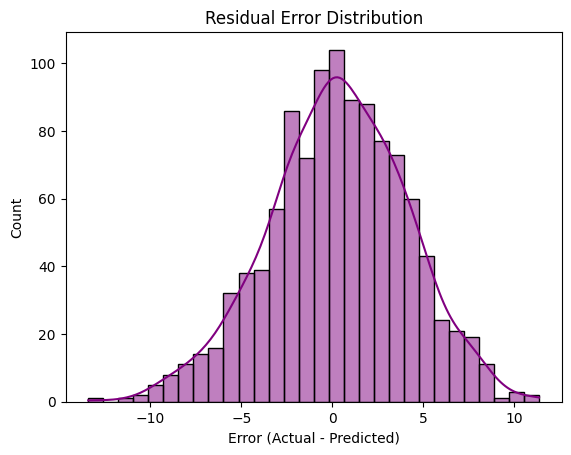

In [69]:
residuals = y_lstm - y_pred.flatten()
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Residual Error Distribution')
plt.xlabel('Error (Actual - Predicted)')
plt.show()
